# Absolute distance method 01

Calculating the absolute distance traveled by a set of particle trajectories in km. 

* Author(s): Laura Gomez Navarro
* Created on: 21/06/23
* Last updated on:

In [4]:
import time

print(time.ctime(time.time()))

Wed Jun 21 16:58:00 2023


### 0.  Imports and package versions

In [5]:
%matplotlib inline
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import xarray as xr

from matplotlib import colors 
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from collections import namedtuple
from shapely import geometry

import scipy 
from scipy import stats, optimize, interpolate

In [6]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.11 64bit [GCC Clang 11.0.0]
IPython 7.16.1
OS Darwin 21.6.0 x86_64 i386 64bit
numpy 1.19.2
matplotlib 3.3.2
xarray 0.16.2
cartopy 0.18.0
scipy 1.5.2
Wed Jun 21 16:58:00 2023 CEST

### 1. Loading the data

In [11]:
filedir = '../Simulations/'

In [12]:
ds = xr.open_dataset(filedir + 'toy_data_01.nc')

In [13]:
ds

<xarray.Dataset>
Dimensions:     (obs: 121, traj: 144)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float32 ...
    lon         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
    U           (traj, obs) float32 ...
    V           (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1.dev20+g92f2fb90
    parcels_mesh:           spherical

### 2. Calculating the distance

### 2.1. Defining the function to calculatethe distance between 2 points in km

In [14]:
from math import sin, cos, sqrt, atan2, radians, pi

def dist_km(lona, lonb, lata, latb):
    """
    Function to calculate the distance between 2 points in km
    Haversine formula used, which assumes the Earth is a sphere.
    source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    """
    
    R = 6373.0 # approximate radius of earth in km

    lat1 = radians(lata)
    lon1 = radians(lona)
    lat2 = radians(latb)
    lon2 = radians(lonb)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


### 2.2. Creating the output data array

In [15]:
abs_dist_01 = ds.lon[:,0].copy() * np.nan

abs_dist_01.shape

(144,)

### 2.3. Calculating the distances traveled during every timestep for all trajectories

In [17]:
%%timeit

for tt in range(0, len(ds.traj)):
    lon_t = ds.lon[tt,:].dropna(dim='obs')
    lat_t = ds.lat[tt,:].dropna(dim='obs')
    abs_dist_01[tt] = dist_km(lon_t[0], lon_t[-1], lat_t[0], lat_t[-1])
        
# abs_dist_01.to_netcdf("abs_dist_01.nc")

149 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2.4. Checking if any values are 0, and dropping them

In [23]:
abs_dist_01

<xarray.DataArray 'lon' (traj: 144)>
array([ 411.04208 ,  453.4008  ,  381.6008  ,  282.05228 , 1242.5476  ,
        480.27228 , 1201.6752  , 1146.2869  ,  908.0078  ,  919.3956  ,
        913.43463 ,  220.22203 , 1008.9668  ,  978.1187  , 1111.2708  ,
        315.65762 , 1207.3734  ,  316.34738 , 1736.6965  ,  603.5743  ,
        398.85455 ,  846.42883 ,  581.2281  ,  350.16443 ,  127.907936,
        526.6734  ,   96.51506 , 1060.3525  ,  994.03064 ,   24.599104,
       1238.1918  ,  571.10583 ,  767.89575 ,  627.98193 ,  630.5732  ,
        433.24515 ,  133.65677 ,  785.67346 ,  184.2212  ,  989.54193 ,
         81.88642 ,   86.57502 ,  723.77246 , 1736.7637  , 1675.4313  ,
       1663.6777  ,  781.6274  ,  753.3882  ,  535.4887  ,  702.92236 ,
         74.10612 ,  154.92816 ,  269.08594 ,   72.24956 ,  384.83676 ,
        389.89783 ,  798.38525 , 1722.8524  , 1616.8757  ,  669.89636 ,
        148.27472 ,  879.46655 ,  417.41785 ,  188.67714 ,  116.22897 ,
        294.26434 ,  118.76671 ,  384.75223 ,  384.20926 ,  239.12842 ,
        787.46765 ,  836.72345 ,  205.82903 ,  708.99817 ,  730.8631  ,
        807.8967  ,  231.73116 ,  141.5095  ,  376.80035 ,  184.07048 ,
        230.14755 ,  494.0636  ,  169.42867 ,  432.00278 ,  700.1224  ,
        323.10477 ,  425.54794 ,  931.1051  ,  744.7003  ,  114.45423 ,
        147.65381 ,  386.98175 ,  810.6764  ,  914.5027  ,  996.60394 ,
       1227.4968  ,  396.53015 ,  561.433   ,  174.67416 ,  681.2424  ,
        583.0263  ,  447.10388 ,  198.39479 ,  450.36694 ,  453.93738 ,
        307.8172  ,  510.4772  ,  344.71515 ,  304.95953 ,  347.53668 ,
        342.34134 ,  311.0616  ,  538.0072  ,  931.88824 ,  472.57233 ,
        267.78708 ,  357.8639  ,  453.324   ,  343.47607 ,  344.36768 ,
        559.48047 ,  283.00296 ,  920.24445 ,  637.0801  ,  733.1881  ,
        838.68726 ,  606.8762  ,  601.77466 ,  532.3691  , 1221.3522  ,
        580.39777 ,  834.7051  ,  262.2627  ,  515.7538  ,  510.86624 ,
        607.5452  ,  674.90967 ,  666.03156 ,  691.1114  ,  634.25055 ,
        631.1047  ,  816.3439  , 1275.1577  , 1022.57715 ], dtype=float32)
Dimensions without coordinates: traj

% --> 'lon' appears , which also cannot be called??
% abs_dist_01.lon , gives error 

In [29]:
abs_dist_01 = abs_dist_01.where(abs_dist_01!=0, drop=True)


In [30]:
abs_dist_01

<xarray.DataArray 'lon' (traj: 144)>
array([ 411.04208 ,  453.4008  ,  381.6008  ,  282.05228 , 1242.5476  ,
        480.27228 , 1201.6752  , 1146.2869  ,  908.0078  ,  919.3956  ,
        913.43463 ,  220.22203 , 1008.9668  ,  978.1187  , 1111.2708  ,
        315.65762 , 1207.3734  ,  316.34738 , 1736.6965  ,  603.5743  ,
        398.85455 ,  846.42883 ,  581.2281  ,  350.16443 ,  127.907936,
        526.6734  ,   96.51506 , 1060.3525  ,  994.03064 ,   24.599104,
       1238.1918  ,  571.10583 ,  767.89575 ,  627.98193 ,  630.5732  ,
        433.24515 ,  133.65677 ,  785.67346 ,  184.2212  ,  989.54193 ,
         81.88642 ,   86.57502 ,  723.77246 , 1736.7637  , 1675.4313  ,
       1663.6777  ,  781.6274  ,  753.3882  ,  535.4887  ,  702.92236 ,
         74.10612 ,  154.92816 ,  269.08594 ,   72.24956 ,  384.83676 ,
        389.89783 ,  798.38525 , 1722.8524  , 1616.8757  ,  669.89636 ,
        148.27472 ,  879.46655 ,  417.41785 ,  188.67714 ,  116.22897 ,
        294.26434 ,  118.76671 ,  384.75223 ,  384.20926 ,  239.12842 ,
        787.46765 ,  836.72345 ,  205.82903 ,  708.99817 ,  730.8631  ,
        807.8967  ,  231.73116 ,  141.5095  ,  376.80035 ,  184.07048 ,
        230.14755 ,  494.0636  ,  169.42867 ,  432.00278 ,  700.1224  ,
        323.10477 ,  425.54794 ,  931.1051  ,  744.7003  ,  114.45423 ,
        147.65381 ,  386.98175 ,  810.6764  ,  914.5027  ,  996.60394 ,
       1227.4968  ,  396.53015 ,  561.433   ,  174.67416 ,  681.2424  ,
        583.0263  ,  447.10388 ,  198.39479 ,  450.36694 ,  453.93738 ,
        307.8172  ,  510.4772  ,  344.71515 ,  304.95953 ,  347.53668 ,
        342.34134 ,  311.0616  ,  538.0072  ,  931.88824 ,  472.57233 ,
        267.78708 ,  357.8639  ,  453.324   ,  343.47607 ,  344.36768 ,
        559.48047 ,  283.00296 ,  920.24445 ,  637.0801  ,  733.1881  ,
        838.68726 ,  606.8762  ,  601.77466 ,  532.3691  , 1221.3522  ,
        580.39777 ,  834.7051  ,  262.2627  ,  515.7538  ,  510.86624 ,
        607.5452  ,  674.90967 ,  666.03156 ,  691.1114  ,  634.25055 ,
        631.1047  ,  816.3439  , 1275.1577  , 1022.57715 ], dtype=float32)
Dimensions without coordinates: traj

% --> missing part to check first if 0 are there
% --> improve line above too??

### 3. Plotting the outputs

#### 3.1. Plotting histogram of absolute distances

Text(0.5, 0, 'Absolute distance [km]')

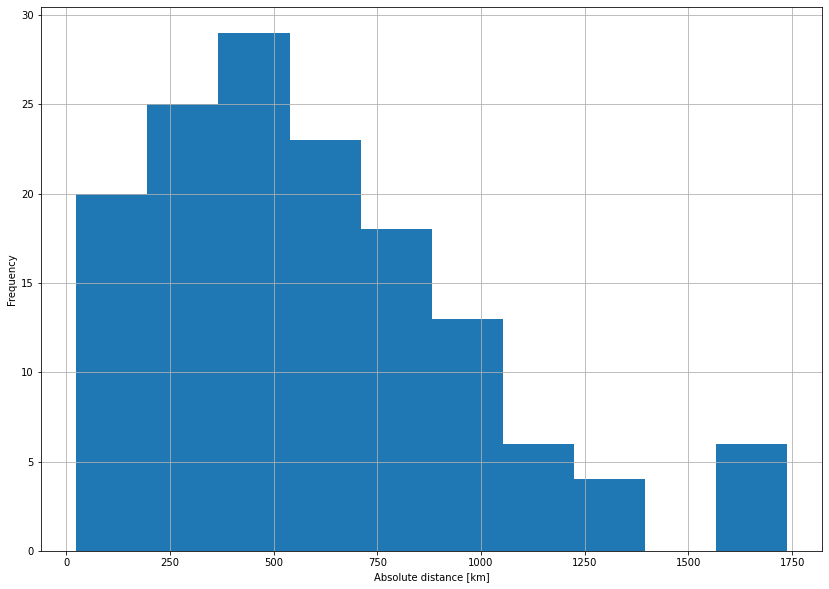

In [33]:
plt.figure(figsize=(14,10))
plt.hist(abs_dist_01)
plt.grid()
plt.ylabel('Frequency')
plt.xlabel('Absolute distance [km]')

#### 3.2. Boxplot of the absolute distance of all the particles:

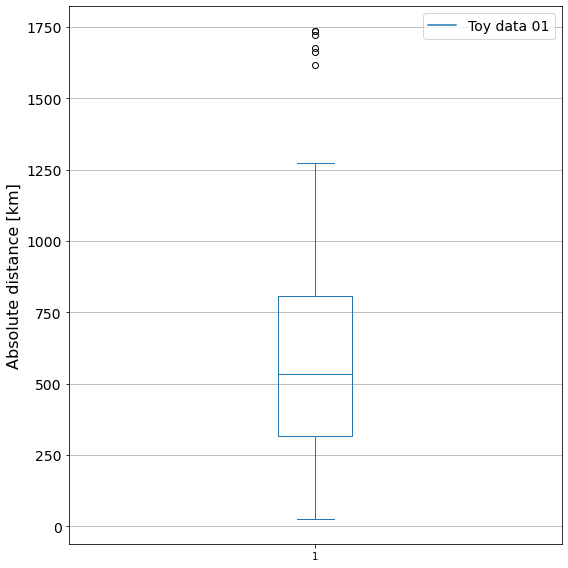

In [37]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
#     plt.setp(bp['facecolor'], color=color)

plt.figure(figsize=(8,8))
ax1 = plt.subplot(111)

bpl = ax1.boxplot(abs_dist_01) #, positions=np.array(range(len(dist_cum_a)))*2.0-0.4, sym='', widths=0.6)
set_box_color(bpl, 'C0') # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='C0', label='Toy data 01')
# plt.plot([], c='C3', label='Tidal forcing')
plt.legend(fontsize=14)
# ax.legend(fontsize=14)

# plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=14)
plt.yticks(fontsize=14)
# plt.xlim(-2, len(ticks)*2)
# plt.ylim(0, 850)
# ax1.set_xticklabels(labels, rotation=45, horizontalalignment='right')
# plt.grid()
ax1.yaxis.grid()
ax1.set_ylabel('Absolute distance [km]', size=16)

plt.tight_layout()
# plt.savefig('figs/cumsum_km_and_total_dist_km_BOXPLOT_01.jpg', dpi=300)
plt.show()